import

In [110]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

zipcodes

In [111]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


type

In [112]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

zipcode 1

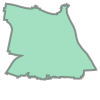

In [113]:
zipcodes.loc[1, 'geometry']

print zip codes

In [114]:
print(zipcodes.loc[1, 'geometry'])

MULTIPOLYGON (((-86.734511869193 36.237735044539, -86.734254399702 36.237714080225, -86.73423861473 36.238021616185, -86.734222683656 36.238132142737, -86.734195411423 36.238336136481, -86.734183956239 36.238417517532, -86.733907599852 36.238381287439, -86.733472375739 36.238326793464, -86.73330602487 36.238305826131, -86.733189242164 36.238291152853, -86.733032384851 36.23827012867, -86.733018143698 36.238270215081, -86.73284160629 36.238247660713, -86.73267796907 36.238226677198, -86.732529272243 36.238207801049, -86.732509140471 36.238451306847, -86.732487067622 36.238704716481, -86.732453955164 36.239084553058, -86.732424772699 36.239082532952, -86.732023085546 36.239061342188, -86.731991327754 36.239441171521, -86.731745674778 36.239416326211, -86.731759246339 36.239022285471, -86.731536739285 36.239015941416, -86.731213978273 36.238985479591, -86.731443679448 36.238742628872, -86.731443544158 36.238742436828, -86.731380481606 36.238655381395, -86.731178872942 36.238377781129, -86

plot

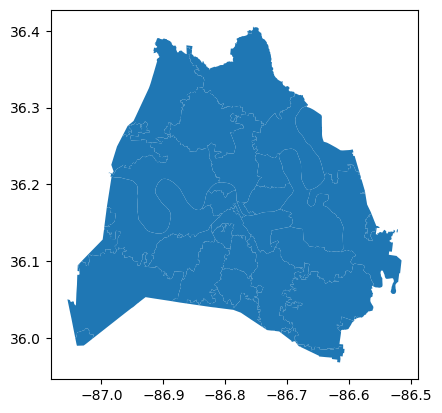

In [115]:
zipcodes.plot();

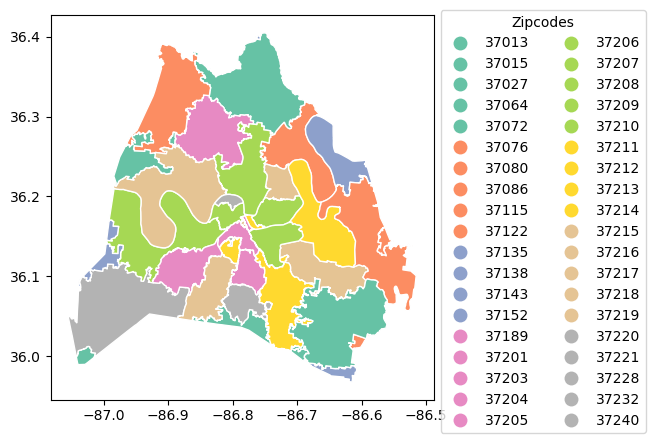

In [116]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(5, 5),
              edgecolor = 'white',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

parks data

In [117]:
bikeracks = pd.read_csv('../data/BikeRacks.csv')
print(bikeracks.shape)
bikeracks.head(3)

(430, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [118]:
bikeracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    430 non-null    object 
 1   Type        430 non-null    object 
 2   OBJECTID    430 non-null    int64  
 3   Domain      430 non-null    object 
 4   Status      430 non-null    object 
 5   IDNumber    430 non-null    int64  
 6   Quantity    430 non-null    int64  
 7   Location    430 non-null    object 
 8   Capacity    430 non-null    int64  
 9   LON         426 non-null    float64
 10  LAT         426 non-null    float64
 11  Detail_Loc  430 non-null    object 
 12  Data_Colle  430 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 43.8+ KB


spatial join (ERROR)

In [138]:
bikeracks['geometry'] = bikeracks.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bikeracks.head(3)

/Users/bryancolson/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.6554527779 36.0499277778)
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.6340625226 36.1852800378)
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.6206705697 36.1584215986)


In [120]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [137]:
bikeracks_geo = gpd.GeoDataFrame(bikeracks, 
                           crs = zipcodes.crs, 
                           geometry = bikeracks['geometry'])

type

In [122]:
type(bikeracks)

pandas.core.frame.DataFrame

In [123]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [124]:
bikeracks_by_zip = gpd.sjoin(bikeracks_geo, zipcodes, op = 'within')

/Users/bryancolson/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [125]:
bikeracks_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: zip, dtype: int64

bike racks per zip

In [126]:
racks_in_37207 = bikeracks_by_zip.loc[bikeracks_by_zip['zip'] == '37207']
racks_in_37207.shape

(21, 17)

polygon 37207

In [127]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

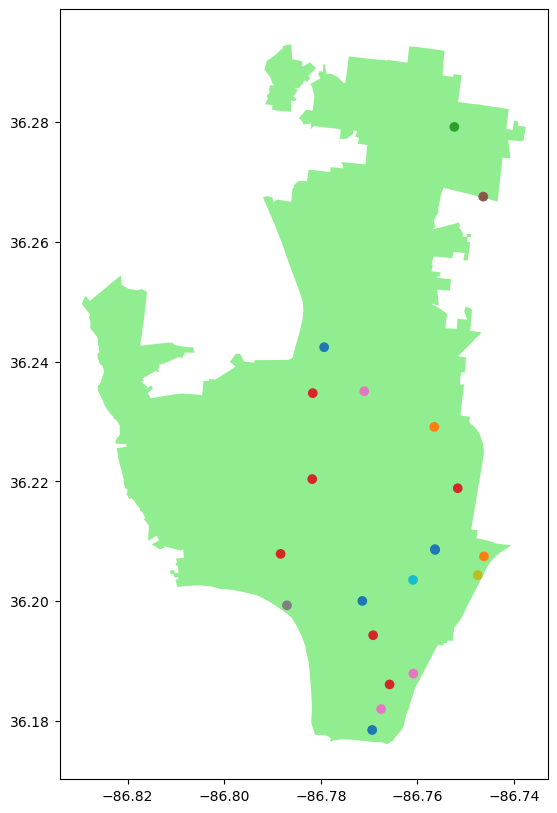

In [128]:
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_37207.plot( ax = ax, column = 'Location');
plt.show();

polygon centroid

In [129]:
polygon37207.geometry.centroid

/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_2560/3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

error

In [130]:
center = polygon37207.geometry.centroid[42]
print(center)

19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry


/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_2560/3414281991.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid


In [135]:
area_center = [center.y, center.x]
print(area_center)

[19    36.287239
42    36.232453
dtype: float64, 19   -86.787261
42   -86.776768
dtype: float64]


In [134]:
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

ValueError: Location should consist of two numerical values, but 19    36.287239
42    36.232453
dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.